## 100DaysofBytewise - Machine Learning Fellowship

##   1. Handling Missing Data in Titanic Dataset
  #### - Task:Identify and handle missing values in the Titanic dataset. Experiment with different strategies such as mean/median  imputation, mode imputation, and dropping rows/columns.
  ## - Dataset: Titanic Dataset

In [ ]:
import pandas as pd
import seaborn as sns
dataset = sns.load_dataset('titanic')
print(dataset.head())

# check for missing values
missing_values = pd.isna(dataset).sum()
print(missing_values)

In [ ]:
dataset.isnull().sum().sort_values(ascending=False)

## handling the missing values using mean , median

In [ ]:
dataset['age'] = dataset['age'].fillna(dataset['age'].mean())
dataset.isnull().sum().sort_values(ascending=False)

In [ ]:
dataset['embark_town'].mode()

In [55]:

# now we will impute the embarked column using mode , because it is a catogerical variable
dataset['embark_town']=dataset['embark_town'].fillna(dataset['embark_town'].mode()[0])
dataset['embarked']=dataset['embarked'].fillna(dataset['embarked'].mode()[0])


In [ ]:
dataset.isnull().sum().sort_values(ascending=False)

## 2. Encoding Categorical Variables in a Car Evaluation Dataset
   #### - Task: Encode categorical variables in the Car Evaluation dataset using one-hot encoding and label encoding. Compare the results.
  ## - Dataset: Car Evaluation Dataset


In [ ]:
import pandas as pd
car_data = pd.read_csv('car evaluation_with.csv')
car_data.head()

In [ ]:
print(car_data[['vhigh', 'vhigh.1', 'small', 'med', 'unacc']].apply(pd.Series.nunique))

In [ ]:
# one hot encoding
one_hot_encoded_data = pd.get_dummies(car_data, columns = ['vhigh', 'vhigh.1','small','med','unacc'])
print(one_hot_encoded_data)

In [ ]:
# Convert boolean values to integers
one_hot_encoded_data = one_hot_encoded_data.astype(int)
print(one_hot_encoded_data)

In [ ]:
# encoding using label encoder
import pandas as pd
from sklearn.preprocessing import LabelEncoder
car_data = pd.read_csv('car evaluation_with.csv')

# Display unique values of the columns to understand the data
print(car_data[['vhigh', 'vhigh.1', 'small', 'med', 'unacc']].apply(pd.Series.nunique))

# Initialize the label encoder
encoder = LabelEncoder()

# Apply label encoding to the specified columns
for column in ['vhigh', 'vhigh.1', 'small', 'med', 'unacc']:
    car_data[column] = encoder.fit_transform(car_data[column])

print(car_data)  

## 3. Scaling Features in the Wine Quality Dataset
  #### - Task: Apply normalization and standardization to the features in the Wine Quality dataset. Analyze how scaling affects the distribution of data.
   ## - Dataset: Wine Quality Dataset


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.149254              0.098940  0.567548  0.606299   0.137725   
1             0.358209              0.215548  0.494126  0.362205   0.209581   
2             0.208955              0.169611  0.508811  0.409449   0.191617   
3             0.238806              0.190813  0.582232  0.330709   0.149701   
4             0.149254              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  Id  
0  0.153846        5   0  
1 

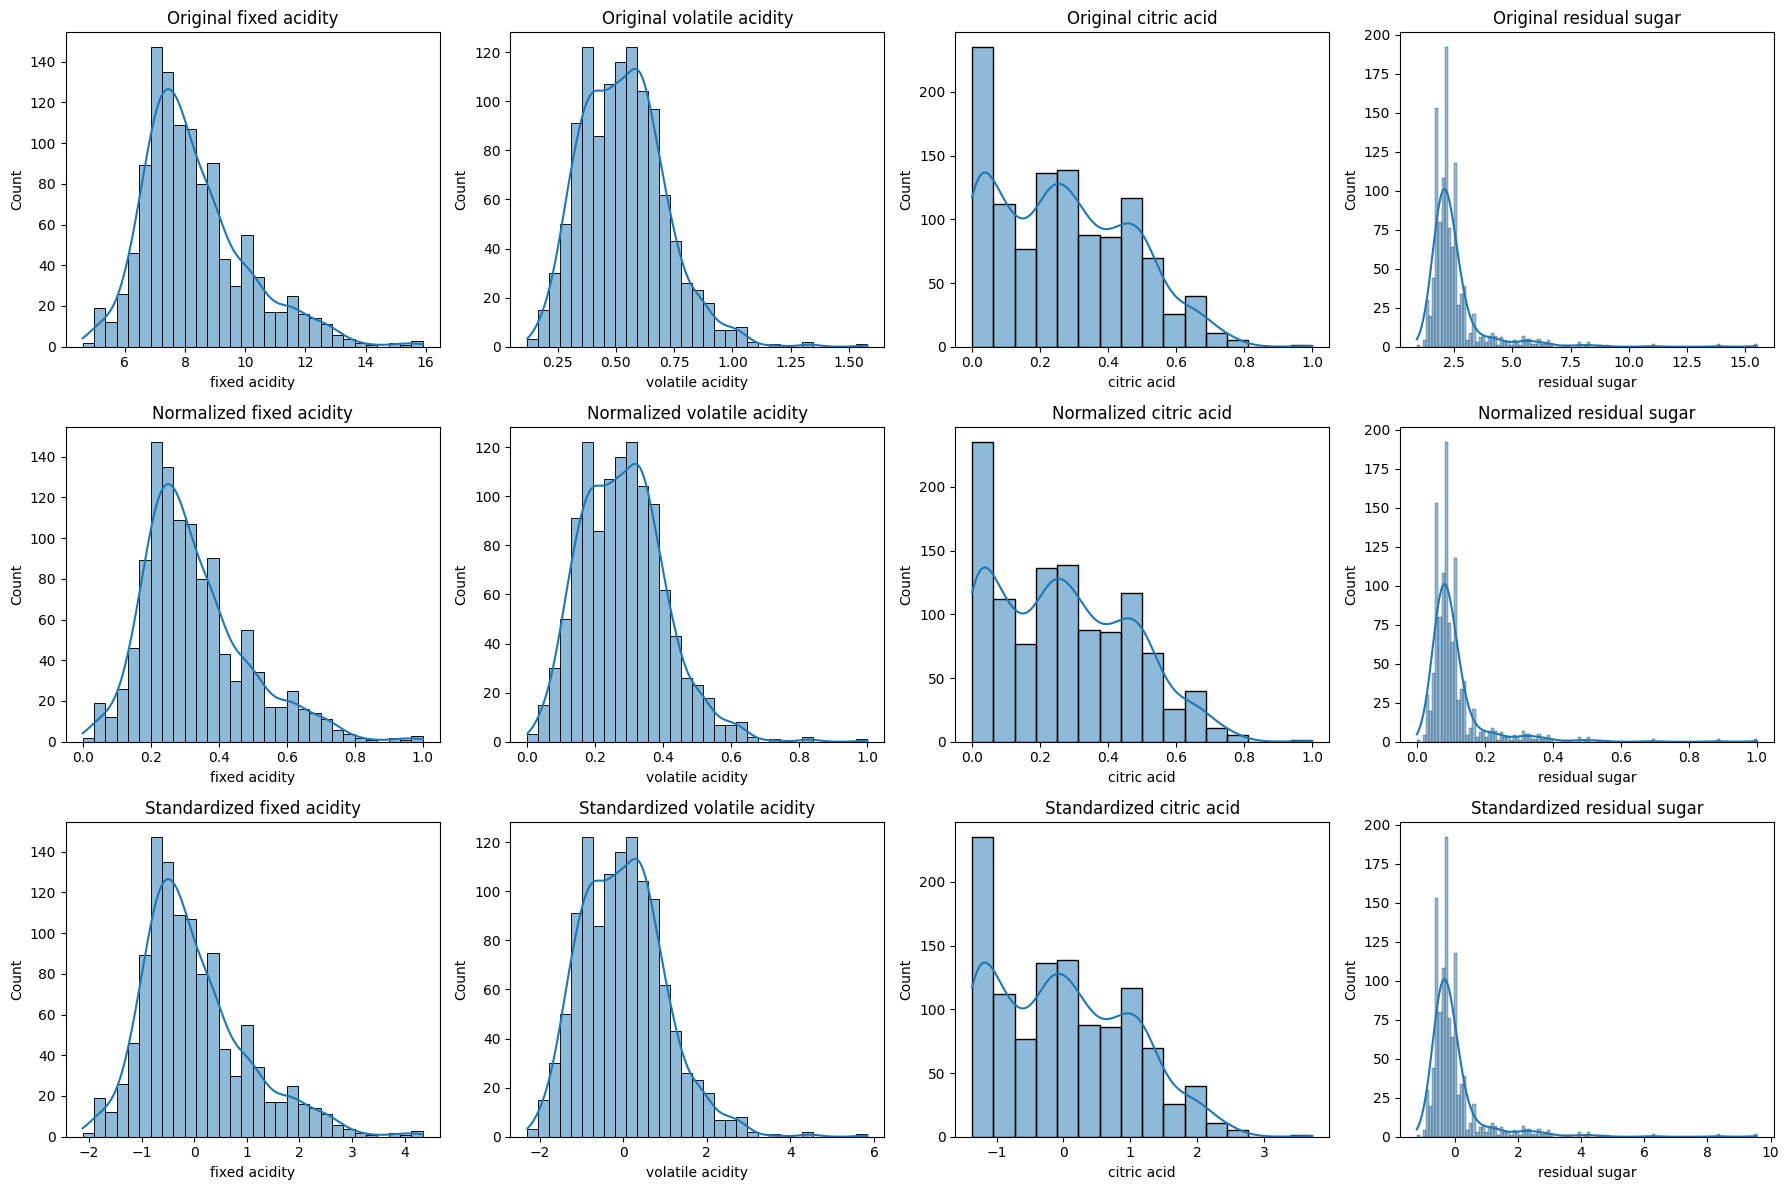

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
wine_data = pd.read_csv('WineQT.csv')
# wine_data.head()


# Normalization
scaler = MinMaxScaler()
# Apply normalization 
features_to_normalize = wine_data.columns.difference(['Id', 'quality'])
normalized_data = wine_data.copy()
normalized_data[features_to_normalize] = scaler.fit_transform(wine_data[features_to_normalize])
print(normalized_data.head())




#standradization
scaler = StandardScaler()
# Apply standardization 
standardized_data = wine_data.copy()
standardized_data[features_to_normalize] = scaler.fit_transform(wine_data[features_to_normalize])
print(standardized_data.head())





features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
# Plot the original data
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(wine_data[feature], kde=True)
    plt.title(f'Original {feature}')

# Plot the normalized data
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 5)
    sns.histplot(normalized_data[feature], kde=True)
    plt.title(f'Normalized {feature}')

# Plot the standardized data
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 9)
    sns.histplot(standardized_data[feature], kde=True)
    plt.title(f'Standardized {feature}')

plt.tight_layout()
plt.show()




## Handling Outliers in the Boston Housing Dataset
  #### - Task: Identify and handle outliers in the Boston Housing dataset using techniques like Z-score, IQR, and visualization methods.
##   - Dataset: Boston Housing Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target

# Display the first few rows of the dataset
print(boston_df.head())

# Visualize the data with boxplots
plt.figure(figsize=(20, 15))
for i, column in enumerate(boston_df.columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(data=boston_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Apply Z-score method
z_scores = np.abs(stats.zscore(boston_df))
threshold = 3
outliers_zscore = np.where(z_scores > threshold)
print(f'Number of outliers detected by Z-score: {len(outliers_zscore[0])}')

# Apply IQR method
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))).sum()
print(f'Number of outliers detected by IQR: {outliers_iqr.sum()}')

# Visualize with scatter plots (example: RM vs. MEDV)
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['RM'], boston_df['MEDV'])
plt.title('Scatter plot of RM vs. MEDV')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.show()

# Handle outliers (example: removing outliers detected by Z-score)
boston_df_cleaned = boston_df[(z_scores < threshold).all(axis=1)]
print(f'Dataset shape before removing outliers: {boston_df.shape}')
print(f'Dataset shape after removing outliers: {boston_df_cleaned.shape}')


## . Data Imputation in the Retail Sales Dataset
   #### - Task: Handle missing values in the Retail Sales dataset using advanced imputation techniques like KNN imputation and MICE.
   ## - Dataset: Retail Sales Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
file_path = 'path/to/your/retail_sales.csv'  # Replace with the actual path to your CSV file
retail_sales_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(retail_sales_df.head())

# Visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(retail_sales_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
retail_sales_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(retail_sales_df), columns=retail_sales_df.columns)

# Display the first few rows of the KNN-imputed dataset
print(retail_sales_knn_imputed.head())

# Apply MICE Imputation
mice_imputer = IterativeImputer(random_state=0)
retail_sales_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(retail_sales_df), columns=retail_sales_df.columns)

# Display the first few rows of the MICE-imputed dataset
print(retail_sales_mice_imputed.head())


## Feature Engineering in the Heart Disease Dataset
  #### - Task: Create new features from existing ones in the Heart Disease dataset, such as age groups, cholesterol levels, and more.
  ## - Dataset: Heart Disease Dataset


In [ ]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('heart.csv')
heart_disease_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(heart_disease_df.head())

# Create age groups
bins = [0, 30, 45, 60, 120]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
heart_disease_df['age_group'] = pd.cut(heart_disease_df['age'], bins=bins, labels=labels, right=False)

# Categorize cholesterol levels
cholesterol_bins = [0, 200, 240, 600]
cholesterol_labels = ['Normal', 'Borderline High', 'High']
heart_disease_df['cholesterol_level'] = pd.cut(heart_disease_df['chol'], bins=cholesterol_bins, labels=cholesterol_labels, right=False)

#
heart_disease_df['risk_factor'] = (
    heart_disease_df['age'] * 0.3 +
    heart_disease_df['chol'] * 0.4 +
    heart_disease_df['trestbps'] * 0.3
)

# Display the first few rows of the modified dataset
print(heart_disease_df.head())

# Optional: Visualize the distribution of the new features
import matplotlib.pyplot as plt
import seaborn as sns

# Age groups distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=heart_disease_df, x='age_group')
plt.title('Distribution of Age Groups')
plt.show()

# Cholesterol levels distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=heart_disease_df, x='cholesterol_level')
plt.title('Distribution of Cholesterol Levels')
plt.show()


## Transforming Variables in the Bike Sharing Dataset
  #### - Task: Apply transformations like log, square root, and Box-Cox transformations to skewed variables in the Bike Sharing dataset.
  ## - Dataset: Bike Sharing Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Load the dataset

data = pd.read_csv('london_merged.csv') 
bike_sharing_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(bike_sharing_df.head())

# Visualize skewed variables
skewed_vars = ['count', 'temp', 'humidity', 'windspeed']  # Replace with your actual skewed variables

plt.figure(figsize=(20, 12))
for i, column in enumerate(skewed_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(bike_sharing_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Apply log transformation
bike_sharing_df['count_log'] = np.log1p(bike_sharing_df['count'])  # np.log1p is used to handle log(0)
bike_sharing_df['temp_log'] = np.log1p(bike_sharing_df['temp'])
bike_sharing_df['humidity_log'] = np.log1p(bike_sharing_df['humidity'])
bike_sharing_df['windspeed_log'] = np.log1p(bike_sharing_df['windspeed'])

# Apply square root transformation
bike_sharing_df['count_sqrt'] = np.sqrt(bike_sharing_df['count'])
bike_sharing_df['temp_sqrt'] = np.sqrt(bike_sharing_df['temp'])
bike_sharing_df['humidity_sqrt'] = np.sqrt(bike_sharing_df['humidity'])
bike_sharing_df['windspeed_sqrt'] = np.sqrt(bike_sharing_df['windspeed'])

# Apply Box-Cox transformation
# Note: Box-Cox transformation requires strictly positive data, so we add a small constant if necessary
bike_sharing_df['count_boxcox'], count_lambda = boxcox(bike_sharing_df['count'] + 1)
bike_sharing_df['temp_boxcox'], temp_lambda = boxcox(bike_sharing_df['temp'] + 1)
bike_sharing_df['humidity_boxcox'], humidity_lambda = boxcox(bike_sharing_df['humidity'] + 1)
bike_sharing_df['windspeed_boxcox'], windspeed_lambda = boxcox(bike_sharing_df['windspeed'] + 1)

# Visualize the transformed variables
transformed_vars = [
    'count_log', 'temp_log', 'humidity_log', 'windspeed_log',
    'count_sqrt', 'temp_sqrt', 'humidity_sqrt', 'windspeed_sqrt',
    'count_boxcox', 'temp_boxcox', 'humidity_boxcox', 'windspeed_boxcox'
]

plt.figure(figsize=(20, 24))
for i, column in enumerate(transformed_vars, 1):
    plt.subplot(6, 2, i)
    sns.histplot(bike_sharing_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


## Feature Selection in the Diabetes Dataset
 #### - Task: Use techniques like correlation analysis, mutual information, and recursive feature elimination (RFE) to select important features in the Diabetes dataset.
  ## - Dataset: Diabetes Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression

# Load the dataset
data = pd.read_csv('diabetes.csv')  
diabetes_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(diabetes_df.head())

# Define features and target variable
X = diabetes_df.drop('Outcome', axis=1)  # Replace 'Outcome' with the actual target variable
y = diabetes_df['Outcome']

# Correlation Analysis
corr_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Mutual Information
mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns)
mi_series.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Mutual Information Scores')
plt.show()

# Recursive Feature Elimination (RFE)
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]

print("Selected Features by RFE:", selected_features)
